<a href="https://colab.research.google.com/github/vanbestzyno/Mushroom-Classification/blob/main/Mushroom_Capstone_ver5_hv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4

/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4


In [ ]:
#!unzip "mushroom4.zip"

In [ ]:
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split
import glob

non_poisonous = glob.glob('/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/non_poisonous/*.*')
poisonus = glob.glob('/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/poisonus/*.*')

data = []
labels = []

for i in non_poisonous:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in poisonus:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True)

X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#train_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Train'
#valid_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Validation'
#test_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Test'

#image_gen = ImageDataGenerator(rescale= 1. /255)

# STEP 2: VISUALIZE DATA

In [ ]:
# this function plots the images according to the customed height & width and the preferred amount
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


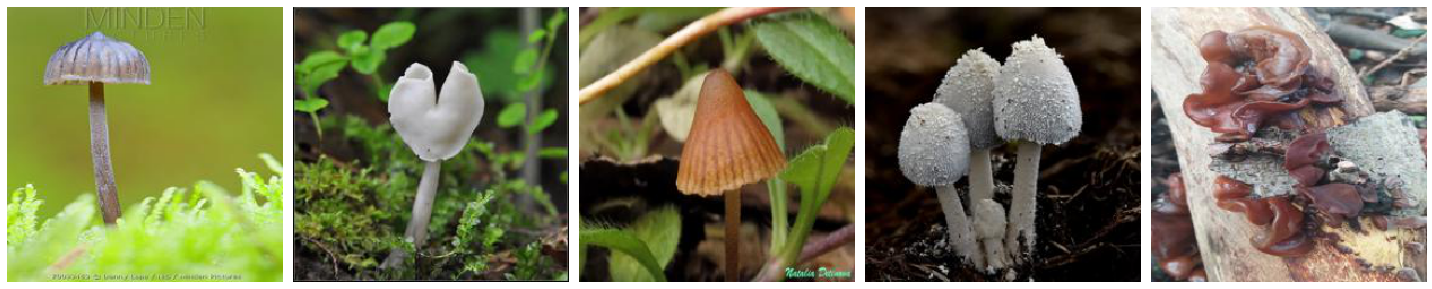

[1 1 1 1 0]


In [ ]:
plotImages(X_train)
print(y_train[:5])

### 0 = Not Poisonous and 1 = Poisonous

# STEP 3: DATA PREPARATION

In [ ]:
# get the shape without the sampling
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=64, activation='relu'))

cnn_model.add(Dense(units=32, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

cnn_model.summary()

In [ ]:
#mobinetV2
cnn_model = Sequential()

cnn_model.add(Conv2D(32, 3, 3, activation='relu', input_shape=Input_shape))

cnn_model.add(Conv2D(32, 3, 3),activation='relu')

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.75))

cnn_model.add(Convolution2D(64, 3, 3),activation='relu')
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.75))

cnn_model.add(Flatten())
cnn_model.add(Dense(64),activation='relu')
cnn_model.add(Dense(32),activation='relu')
cnn_model.add(Dropout(0.75))
cnn_model.add(Dense(2), activation='softmax')

cnn_model.summary()

NameError: ignored

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = cnn_model.fit(X_train,
                        y_train,
                        epochs=100,
                        batch_size=8,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

Epoch 1/100
337/337 [==============================] - 17s 21ms/step - loss: 0.6912 - accuracy: 0.5946 - val_loss: 0.6704 - val_accuracy: 0.6431
Epoch 2/100
337/337 [==============================] - 5s 16ms/step - loss: 0.6654 - accuracy: 0.5916 - val_loss: 0.6650 - val_accuracy: 0.6345
Epoch 3/100
337/337 [==============================] - 6s 18ms/step - loss: 0.6590 - accuracy: 0.6146 - val_loss: 0.6422 - val_accuracy: 0.6466
Epoch 4/100
337/337 [==============================] - 6s 17ms/step - loss: 0.6448 - accuracy: 0.6209 - val_loss: 0.6361 - val_accuracy: 0.6776
Epoch 5/100
337/337 [==============================] - 6s 17ms/step - loss: 0.6285 - accuracy: 0.6343 - val_loss: 0.6361 - val_accuracy: 0.6655
Epoch 6/100
337/337 [==============================] - 6s 17ms/step - loss: 0.6136 - accuracy: 0.6532 - val_loss: 0.6160 - val_accuracy: 0.6879
Epoch 7/100
337/337 [==============================] - 5s 16ms/step - loss: 0.5949 - accuracy: 0.6658 - val_loss: 0.6661 - val_accuracy

# STEP 5: EVALUATE THE MODEL

In [ ]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print(score)

[2.833303451538086, 0.6120689511299133]


In [ ]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.6121


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

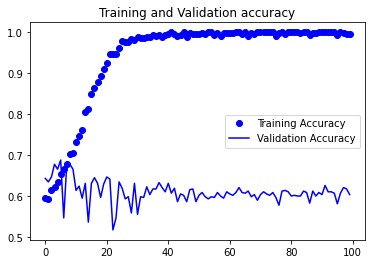

In [ ]:
accuracy_cnn = history.history['accuracy']
val_accuracy_cnn = history.history['val_accuracy']

loss_cnn = history.history['loss']
val_loss_cnn = history.history['val_loss']

epochs_cnn = range(len(accuracy_cnn))

plt.plot(epochs_cnn, accuracy_cnn, 'bo', label='Training Accuracy')
plt.plot(epochs_cnn, val_accuracy_cnn, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

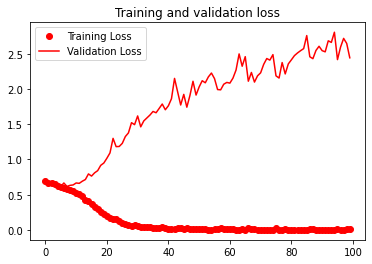

In [ ]:
plt.plot(epochs_cnn, loss_cnn, 'ro', label='Training Loss')
plt.plot(epochs_cnn, val_loss_cnn, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
y_predict = cnn_model.predict(X_test)
y_pred = y_predict[:,1]

19/19 [==============================] - 0s 16ms/step


In [ ]:
y_predict = np.argmax(cnn_model.predict(X_test), axis=1)

19/19 [==============================] - 0s 20ms/step


In [ ]:
#get the predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=1)
print(predicted_classes)
#get the indices to be plotted
print(y_test)

19/19 [==============================] - 0s 21ms/step
[1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1

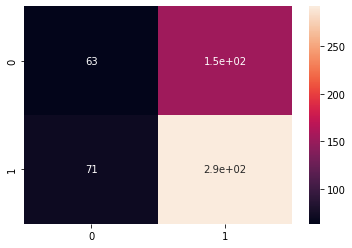

In [ ]:
# showing the confusion matrix of the original CNN model 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

In [ ]:
cm_df = pd.DataFrame(cm)

In [ ]:
# labelling the confusion matrix to make easier to understand 
cm_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm_final_df = cm_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,63,154
Actually Poisonous,71,292


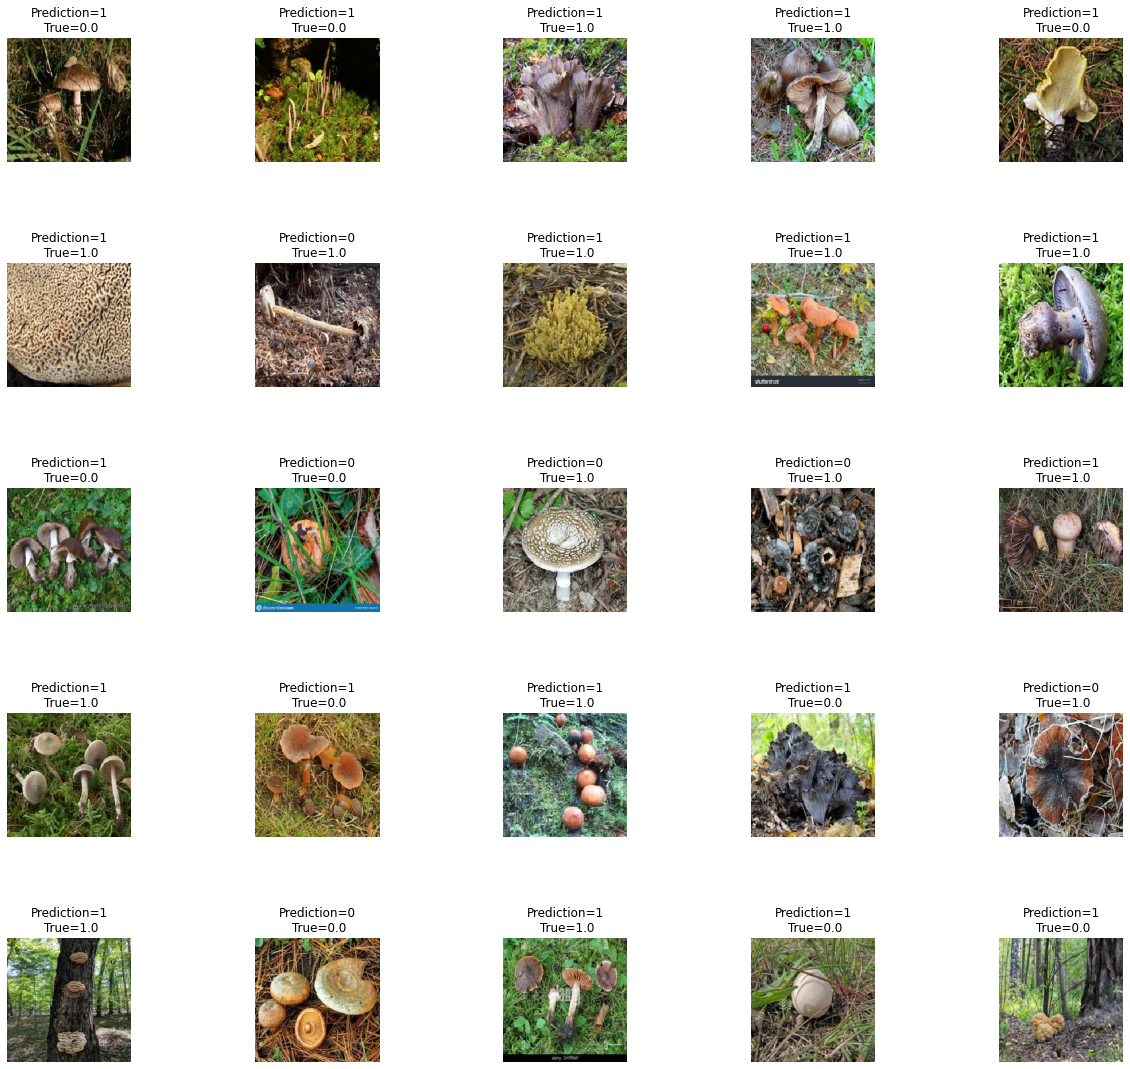

In [ ]:
# This display 5 by 5 images showing the class the models predict and the class the image actually belongs to
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
# By Dr Ryan Ahemd 
# Drawings of mushrooms are accepted in my model 

# STEP 6: CHANGING THE THRESHOLD

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
precision_score(y_test, predicted_classes)

0.6547085201793722

**Precision answers the question**: How correct am I predicting poisonous mushrooms? produces no false positives has a precisions of 1

In [ ]:
recall_score(y_test, predicted_classes)

0.8044077134986226

**Recall answers the question**: Out of all the poisonous mushrooms what is the amount of poisonous mushrooms that predicted correctly? produces no false negatives has a recall of 1

In [ ]:
f1_score(y_test, predicted_classes)

0.7218788627935723

**F1**: It is the weighted average of precision and recall. It takes both false positives and false negatives into account. It is an overall measure of a model's accuracy that combiens precisiona nd recall. 

**Formula**: 
F1 = 2 * (precision * recall)/(precision + recall)


**For Below:**
Trying to eliminate false negatives, as a result, it will increase my false positives. I do this by lowering the threshold to 20%. Hence, if it has a 20% chance or more being poisonous, I would label it as poisonous rather than more than 50%.

In [ ]:
# Make probabilistic predictions for the X test data
y_proba = cnn_model.predict(X_test)[:,1]

# Precision and Recall using the default cut off at 0.5
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# The default cut off is lower at 0.2 
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

19/19 [==============================] - 0s 21ms/step
Threshold of 0.5:
Precision score: 0.6547085201793722
Recall score: 0.8044077134986226

Threshold of 0.2:
Precision score: 0.6527196652719666
Recall score: 0.859504132231405


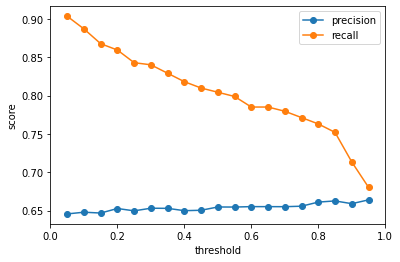

In [ ]:
from sklearn.metrics import accuracy_score

thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

It looks like if I want to find an optimal threshold to maximize the precision and recall, I should have a cut off value of around 0.81. 

The first few times I ran my results, the data was a bit different than the one I have now. 

## Confusion Matrix with the Changed Threshold

In [ ]:
y_pred2 = np.where(y_pred >= 0.2, 1, 0)

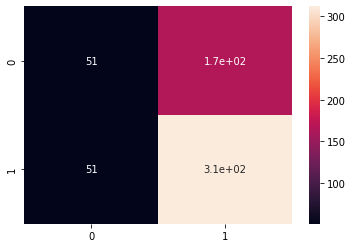

In [ ]:
change_threshold_cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (6,4))
sns.heatmap(change_threshold_cm, annot=True)

In [ ]:
threshold_df = pd.DataFrame(change_threshold_cm)

In [ ]:
threshold_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
threshold_final_df = threshold_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
threshold_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,51,166
Actually Poisonous,51,312


# STEP 7: MODEL AUGMENTATION

**Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, shifting, changing the brightness and rotating the original images.**


In [ ]:
X_train_aug = X_train.astype('float32')
X_test_aug = X_test.astype('float32')
X_validation_aug = X_validation.astype('float32')

In [ ]:
X_train_aug.shape

(2696, 256, 256, 3)

# DATA VISUALIZATION FOR AUGMENTED IMAGES

In [ ]:
# n represents 10 images for each batch
n = 10

X_train_sample_aug = X_train_aug[:n]

In [ ]:
X_train_sample_aug.shape

(10, 256, 256, 3)

In [ ]:
aug_train = ImageDataGenerator(rotation_range=90)
aug_train.fit(X_train_sample_aug)

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

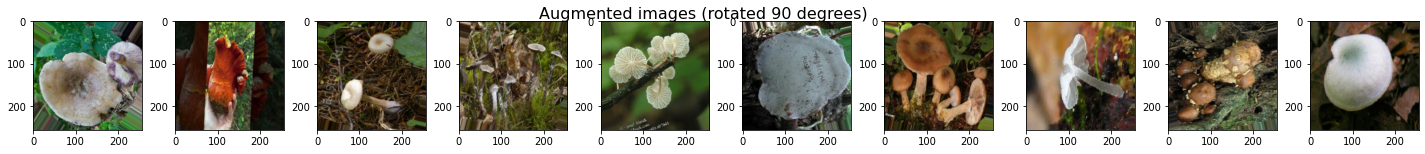

In [ ]:
# Displaying rotating images for each batch from x train
fig = plt.figure(figsize = (25,2))
for x_batch in aug_train.flow(X_train_sample_aug, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)', fontsize=16)
     plt.show()
     break;
    
# Partially by Dr Ahmed and the rest of it I altered it to my liking 

# MODEL TRAINING WITH THE AUGMENTED DATASET

In [ ]:
aug_gen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True
                             )

In [ ]:
aug_gen.fit(X_train)

In [ ]:
history_aug = cnn_model.fit_generator(aug_gen.flow(X_train_aug, y_train, batch_size = 1), epochs = 100, validation_data = (X_validation_aug,y_validation))

In [ ]:
history_aug.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
val_accuracy_aug = history_aug.history['val_accuracy']

In [ ]:
epochs_aug = range(len(val_accuracy_aug))

In [ ]:
# putting it into a Dataframe so I could use it for the presentation 
model_compare = pd.DataFrame({'Validation Accuracy CNN':val_accuracy_cnn, 'Validation Accuracy Augmentation':val_accuracy_aug, 'Epochs':epochs_aug})

In [ ]:
model_compare.to_csv('/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/compare_model_ver5.csv')

# AUGMENTED MODEL EVALUATION 

In [ ]:
score = cnn_model.evaluate(X_test_aug, y_test)
print('Test accuracy', score[1])

19/19 [==============================] - 1s 30ms/step - loss: 0.6751 - accuracy: 0.6638
Test accuracy 0.6637930870056152


In [ ]:
#predicted_classes_aug = cnn_model.predict_classes(X_test_aug)
predicted_classes_aug = np.argmax(cnn_model.predict(X_test_aug), axis=1)


19/19 [==============================] - 1s 19ms/step


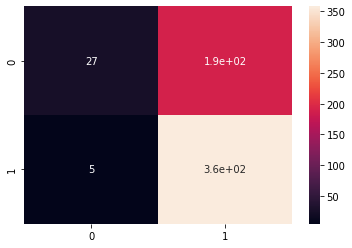

In [ ]:
aug_cm_eva = confusion_matrix(y_test, predicted_classes_aug)
plt.figure(figsize = (6,4))
sns.heatmap(aug_cm_eva, annot=True)

In [ ]:
augmentation_df = pd.DataFrame(aug_cm_eva)

In [ ]:
augmentation_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
augmentation_df_final = augmentation_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
augmentation_df_final

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,27,190
Actually Poisonous,5,358


# STEP 8: VGG16 MODEL

# PULLING DOWN THE MODEL FROM THE LIBRARY 

In [ ]:
#Keras has a library of pre-trained model able to pull down for fine tuning 
vgg16_model = keras.applications.vgg16.VGG16()
# by DeepLizard 

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**The last layer has 1000 layers and I will not classifying on 1000 categories. My model will only have 2 categories.**

In [ ]:
vgg16_model.layers.pop()

In [ ]:
# Sequential
new_model = keras.Sequential() 
for layer in vgg16_model.layers: # iterate all throughout the VGG Model and add the sequential layer to it
    new_model.add(layer)

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# exclude from future training, good for fine tuning - exactly how they are in terms of their weight 
for layer in vgg16_model.layers:
    layer.trainable = False #(True)

In [ ]:
new_model.add(Dense(2, activation='softmax'))

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# TRAIN THE FINE-TUNED NEW_MODEL 

In [ ]:
train_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Train'
valid_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Validation'
test_path = '/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/Test'

image_gen = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True) 

train_batches = image_gen.flow_from_directory(
    train_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=25 # change this to a smaller number for plotting such as 20
)
validation_batches = image_gen.flow_from_directory(
    valid_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=8 # change this to a smaller number when plotting also around 20 for visibility 
)

test_batches = image_gen.flow_from_directory(
    test_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=206 # change this to a lower number for plotting 
)

Found 16583 images belonging to 2 classes.
Found 4750 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.


In [ ]:
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_new = new_model.fit(train_batches,
                        steps_per_epoch=38,
                        validation_data = validation_batches,
                        validation_steps=100,
                        epochs=100,
                        verbose=1)

Epoch 1/100
38/38 [==============================] - 291s 8s/step - loss: 0.6876 - accuracy: 0.6105 - val_loss: 0.6873 - val_accuracy: 0.5987
Epoch 2/100
38/38 [==============================] - 274s 7s/step - loss: 0.6865 - accuracy: 0.6099 - val_loss: 0.6870 - val_accuracy: 0.5962
Epoch 3/100
38/38 [==============================] - 224s 6s/step - loss: 0.6870 - accuracy: 0.5926 - val_loss: 0.6852 - val_accuracy: 0.6062
Epoch 4/100
38/38 [==============================] - 254s 7s/step - loss: 0.6854 - accuracy: 0.6053 - val_loss: 0.6847 - val_accuracy: 0.6050
Epoch 5/100
38/38 [==============================] - 192s 5s/step - loss: 0.6824 - accuracy: 0.6316 - val_loss: 0.6813 - val_accuracy: 0.6263
Epoch 6/100
38/38 [==============================] - 162s 4s/step - loss: 0.6840 - accuracy: 0.6042 - val_loss: 0.6829 - val_accuracy: 0.6062
Epoch 7/100
38/38 [==============================] - 172s 5s/step - loss: 0.6850 - accuracy: 0.5863 - val_loss: 0.6772 - val_accuracy: 0.6475
Epoch 

In [ ]:
history_new.history.keys()

In [ ]:
val_accuracy_new = history_new.history['val_accuracy']

In [ ]:
new_df = pd.DataFrame({'epochs':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100], 'Validation Accuracy VGG': val_accuracy_new})

In [ ]:
new_df.to_csv('/content/drive/MyDrive/Deep learning/Mushroom Classification/mushroom4/new_model_ver4.csv')

# FINE-TUNED MODEL EVALUATION 

In [ ]:
X_test_new, y_test_new = next(test_batches)

In [ ]:
def plotImages2(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = np.array(img).astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# By Dr Ahmed 

In [ ]:
plotImages2(X_test_new)
y_test2 = y_test_new[:,0]
print(y_test2[:6])

### 0 is not poisonous and 1 is poisonous

In [ ]:
print(y_test2)

In [ ]:
score = new_model.evaluate(X_test_new, y_test_new,verbose=0)

In [ ]:
print('Test Accuracy : {:.4f}'.format(score[1]))

In [ ]:
predictions = new_model.predict(test_batches, steps=1, verbose=0)

In [ ]:
cm2 = confusion_matrix(y_test2, np.round(predictions[:,0]))

In [ ]:
cm2

In [ ]:
new_model_cm2 = pd.DataFrame(cm2)

In [ ]:
new_model_cm2.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm2_df = new_model_cm2.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm2_df

In [ ]:
history_new.history.keys()

In [ ]:
accuracy_new = history_new.history['accuracy']
val_accuracy_new = history_new.history['val_accuracy']
loss_new = history_new.history['loss']
val_loss_new = history_new.history['val_loss']

epochs_new = range(len(accuracy_new))

plt.plot(epochs_new, accuracy_new, 'bo', label='Training Accuracy')
plt.plot(epochs_new, val_accuracy_new, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

In [ ]:
plt.plot(epochs_new, loss_new, 'ro', label='Training Loss')
plt.plot(epochs_new, val_loss_new, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()